In [1]:
using Paths
using Plots
using LinearAlgebra

[ Info: Precompiling Paths [4a712326-4906-46e3-95f2-b945078f68f6] (cache misses: include_dependency fsize change (2), mismatched flags (18))


In [29]:
acos(0.25) / π * 180

75.52248781407009

[ Info: Saved animation to /Users/brendan/Documents/projects/paths/julia/Paths/notebooks/tmp.gif


Plots.AnimatedGif("/Users/brendan/Documents/projects/paths/julia/Paths/notebooks/tmp.gif")
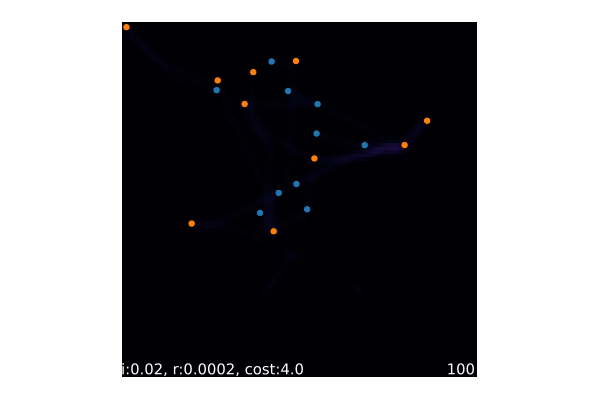

In [30]:
settings = Paths.Settings(X=100, Y=100, maxCost=4.0, patchImprovement=0.02, patchRecovery=0.0002, numWalkers=10)
sim = Paths.MakeSimulation(settings)

@gif for i in 1:100
    for j in 1:100
        Paths.update!(sim)
    end
    Paths.viz(sim)
end


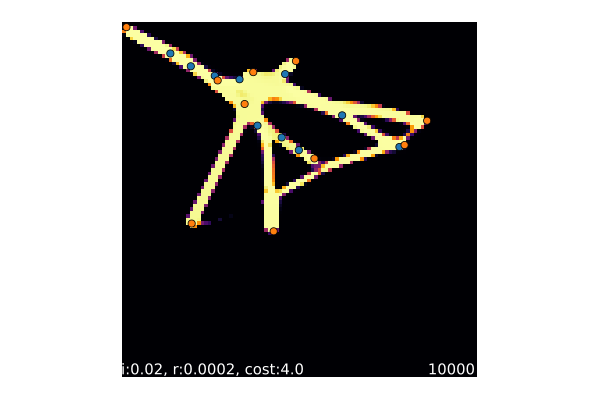

In [31]:
Paths.viz(sim)

In [32]:
snapshot = Paths.snapshot(sim);
paths = snapshot.paths;

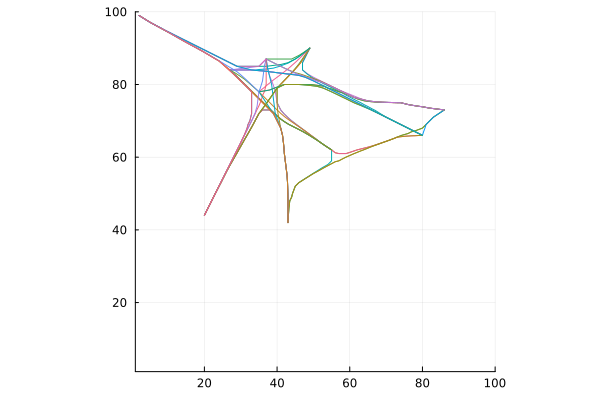

In [33]:
pp = plot([p[1] for p in paths[1]], [p[2] for p in paths[1]], lims=(1, 100), legend=false, aspect_ratio=1)
for path in paths
    plot!([p[1] for p in path], [p[2] for p in path])
end
display(pp)

19


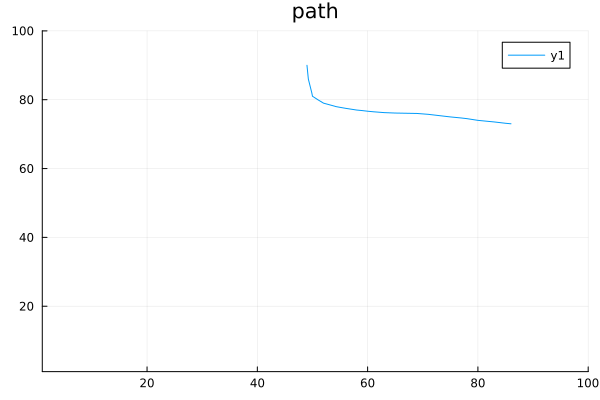

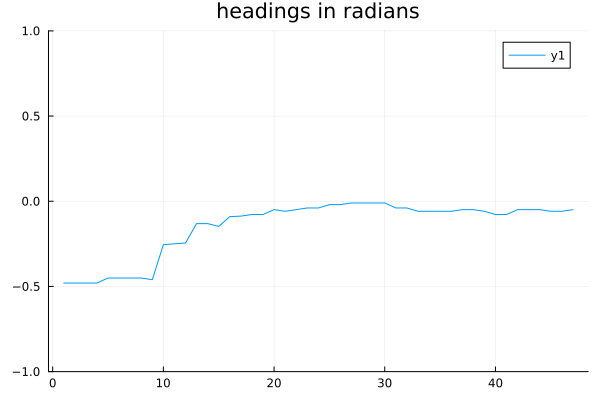

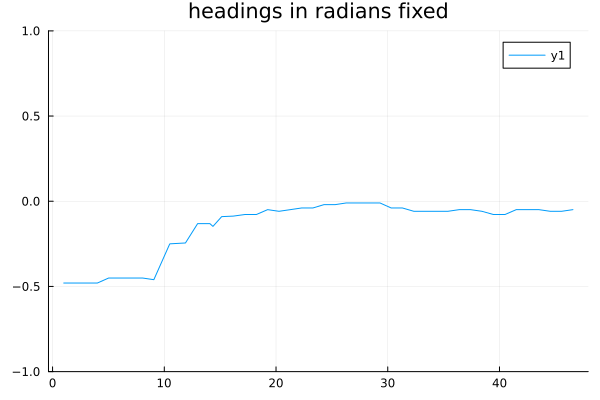

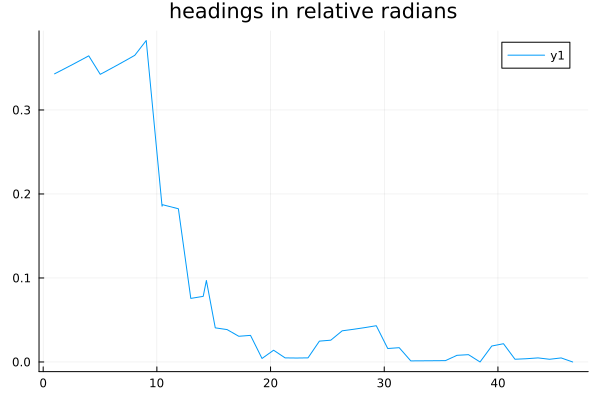

In [10]:
# function anglesInPath(path::Paths.Path)::Array{Float64}
# for _p in [19]
_p = 19
path = paths[_p]
steps = []
for i in 1:length(path)-1
    push!(steps, path[i+1] .- path[i])
end
angles = [atan(s[2], s[1])/(π) for s in steps]
lengths = [norm(s) for s in steps]
cumulative = [sum(lengths[1:i]) for i in 1:length(lengths)]
println(_p)
display(plot([p[1] for p in path], [p[2] for p in path], title="path", xlim=(1, 100), ylim=(1, 100)))
display(plot(angles, title="headings in radians", ylim=(-1, 1)))
display(plot(cumulative, angles, title="headings in radians fixed", ylim=(-1, 1)))
display(plot(cumulative, [h[1] for h in Paths.weightedHeadings(path)], title="headings in relative radians"))

# end

In [17]:
function weightedHeadings(path::Paths.Path)::Array{Tuple{Float64,Float64}}
    headings = Array{Tuple{Float64,Float64}}(undef, length(path) - 1)
    target = path[length(path)]
    for i in 1:length(path)-1
        step = path[i+1] .- path[i]
        stepAngle = atan(step[2], step[1]) / π
        targetStep = target .- path[i]
        targetAngle = atan(targetStep[2], targetStep[1]) / π
        # angle of 0.25 above and 0.25 below should count the same
        differenceAngle = abs(stepAngle - targetAngle)
        # there may be a better way to accomplish this but I'm not sure
        differenceAngle = min(2.0 - differenceAngle, differenceAngle)
        headings[i] = (differenceAngle, norm(step))
    end
    return headings
end

weightedHeadings (generic function with 1 method)

In [26]:
acos(0.5) / π * 180

60.00000000000001

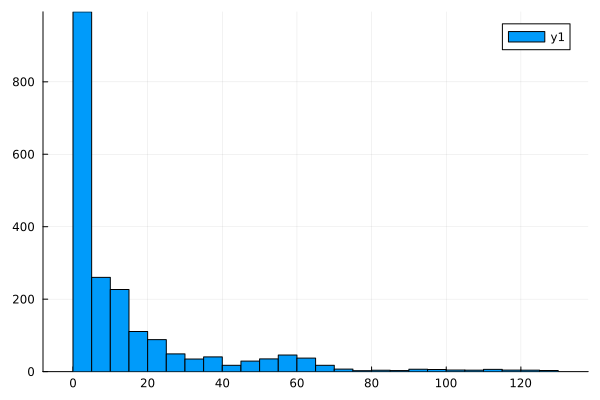

In [34]:
weighteds = vcat([weightedHeadings(p) for p in paths]...)
histogram([w[1]*180 for w in weighteds], weights=[w[2] for w in weighteds], bins=50)
    # as = [w[1] for w in weighteds]
# as = [min(a, 2.0 - a) for a in as]
# display(plot(cumulative, as.*180, title="weighted headings"))


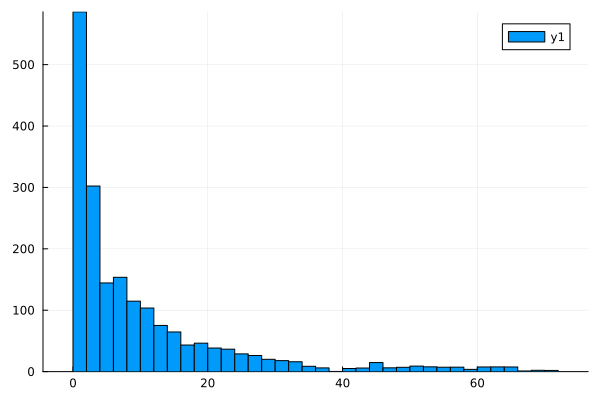

In [27]:
weighteds = vcat([weightedHeadings(p) for p in paths]...)
histogram([w[1]*180 for w in weighteds], weights=[w[2] for w in weighteds], bins=50)
    # as = [w[1] for w in weighteds]
# as = [min(a, 2.0 - a) for a in as]
# display(plot(cumulative, as.*180, title="weighted headings"))


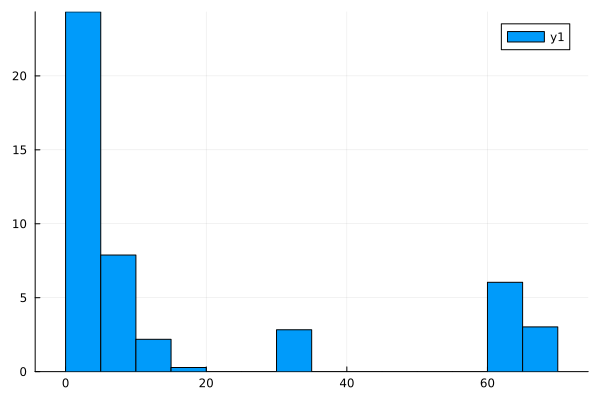

In [56]:
histogram(as.*180, weights=[w[2] for w in weighteds], bins=30)